# This notebook is for A2: Bias in data
## It will focus on the agression and toxicity datasets from            
## https://figshare.com/projects/Wikipedia_Talk/16731

### In this notebook I will be atempting to answer the following questions: 
1. (A) Demographics have a different idea of what agression is (not uniform distribution)
   (B) The same question but for toxicity
   
2. (A) Annotators from high school will label less comments as agressive than annotators with a master's or doctorate.
   (B) The same question but for toxicity
 
   
3. There will be a positive linear correlation between the number of aggressive labeled comments and toxic labeled comments when grouped by age.

4. There is an even distribution of answers from the age and education demographics.

## **Step 1** Import the libraries needed

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Step 2** Import the data

### 2.1 This loads the data from the agression and toxicity csvs (Note they are \t separated)

In [90]:
agression_annotations = pd.read_csv('aggression_annotations.tsv', sep='\t')
a_demographics = pd.read_csv('aggression_worker_demographics.tsv', sep='\t') #worker

toxicity_annotations = pd.read_csv('toxicity_annotations.tsv', sep='\t')
t_demographics = pd.read_csv('toxicity_worker_demographics.tsv', sep='\t') #worker

### 2.2 Joing the csvs into their completed versions for agression and toxicity

In [91]:
anno_demo = agression_annotations.join(a_demographics.set_index('worker_id'), on='worker_id')

t_anno_demo = toxicity_annotations.join(t_demographics.set_index('worker_id'), on='worker_id')

## **Step 3** Extract education, age, and gender from the dataframes

### 3.1 Do extraction for the agression dataframe

In [94]:
none = anno_demo.loc[anno_demo['education'] == 'none']
hs = anno_demo.loc[anno_demo['education'] == 'hs']
bachelors = anno_demo.loc[anno_demo['education'] == 'bachelors']
masters = anno_demo.loc[anno_demo['education'] == 'masters']
doc = anno_demo.loc[anno_demo['education'] == 'doctorate']
pro = anno_demo.loc[anno_demo['education'] == 'professional']

ages = ['Under 18', '18-30', '30-45', '45-60', 'Over 60']

_17 = anno_demo.loc[anno_demo['age_group'] == ages[0]]
_30 = anno_demo.loc[anno_demo['age_group'] == ages[1]]
_45 = anno_demo.loc[anno_demo['age_group'] == ages[2]]
_60 = anno_demo.loc[anno_demo['age_group'] == ages[3]]
old = anno_demo.loc[anno_demo['age_group'] == ages[4]]

gender = ['female', 'male']

f = anno_demo.loc[anno_demo['gender'] == gender[0]]
m = anno_demo.loc[anno_demo['gender'] == gender[1]]

### 3.2 Create 3 dataframes that contain the amount of agressivly labeled comments based on (education, age, and gender)

In [97]:
ae =pd.DataFrame({"aggressive count": [sum(list(none['aggression'])), sum(list(hs['aggression'])), sum(list(bachelors['aggression'])),
                                      sum(list(masters['aggression'])), sum(list(doc['aggression'])), sum(list(pro['aggression']))],
                  "Education": ["None", "HS", "Bachelors", "Masters", "Doc.", "Pro"] })

aa =pd.DataFrame({"aggressive count": [sum(list(_17['aggression'])), sum(list(_30['aggression'])), sum(list(_45['aggression'])),
                                      sum(list(_60['aggression'])), sum(list(old['aggression']))],
                  "Age": ages })

ag =pd.DataFrame({"aggressive count": [sum(list(f['aggression'])), sum(list(m['aggression']))],
                  "Gender":gender })

### 3.1 Do extraction for the toxicity dataframe

In [98]:
# Here I am getting the education demographic to see if the distribution is normal
none = t_anno_demo.loc[t_anno_demo['education'] == 'none']
hs = t_anno_demo.loc[t_anno_demo['education'] == 'hs']
bachelors = t_anno_demo.loc[t_anno_demo['education'] == 'bachelors']
masters = t_anno_demo.loc[t_anno_demo['education'] == 'masters']
doc = t_anno_demo.loc[t_anno_demo['education'] == 'doctorate']
pro = t_anno_demo.loc[t_anno_demo['education'] == 'professional']

ages = ['Under 18', '18-30', '30-45', '45-60', 'Over 60']

_17 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[0]]
_30 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[1]]
_45 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[2]]
_60 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[3]]
old = t_anno_demo.loc[t_anno_demo['age_group'] == ages[4]]

gender = ['female', 'male']

f = t_anno_demo.loc[t_anno_demo['gender'] == gender[0]]
m = t_anno_demo.loc[t_anno_demo['gender'] == gender[1]]

### 3.2 Create 3 dataframes that contain the amount of toxicly labeled comments based on (education, age, and gender)

In [99]:
te =pd.DataFrame({"toxicity count": [sum(list(none['toxicity'])), sum(list(hs['toxicity'])), sum(list(bachelors['toxicity'])),
                                      sum(list(masters['toxicity'])), sum(list(doc['toxicity'])), sum(list(pro['toxicity']))],
                  "Education": ["None", "HS", "Bachelors", "Masters", "Doc.", "Pro"] })

ta =pd.DataFrame({"toxicity count": [sum(list(_17['toxicity'])), sum(list(_30['toxicity'])), sum(list(_45['toxicity'])),
                                      sum(list(_60['toxicity'])), sum(list(old['toxicity']))],
                  "Age": ages })

tg =pd.DataFrame({"toxicity count": [sum(list(f['toxicity'])), sum(list(m['toxicity']))],
                  "Gender":gender })

### 3.3 Combine the aggression and toxicity data frames into 3 final dataframes

In [101]:
education = ae.join(te.set_index('Education'), on='Education')
education = education.set_index('Education')

age = aa.join(ta.set_index('Age'), on='Age')
age = age.set_index('Age')

gender = ag.join(tg.set_index('Gender'), on='Gender')
gender = gender.set_index('Gender')

## As you can see from the three bar charts below the answer to 1 is that the different demographics have varying ideas of what toxic/aggressive comments are, there is not a uniform distribution across the different ages, education levels, or genders. <br> Create and display above dataframes

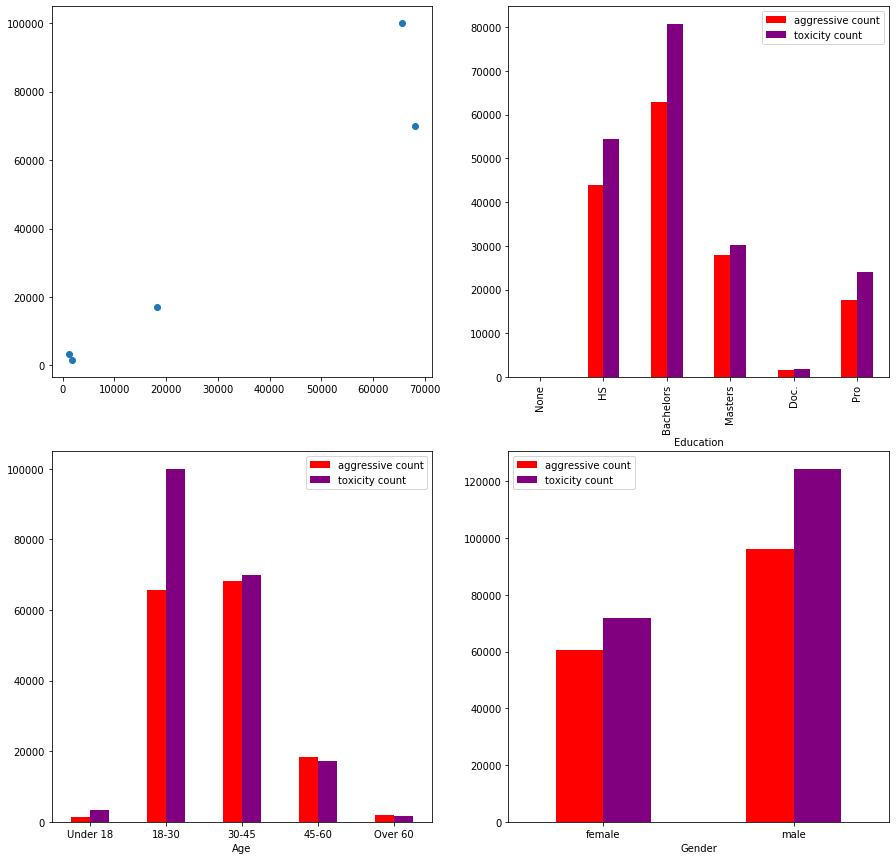

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axes[0,0].scatter(x=age['aggressive count'], y=age['toxicity count'])
education.plot(kind='bar',color=['red', '#800080'], ax=axes[0,1])
age.plot(kind='bar',rot=0, color=['red', '#800080'], ax=axes[1,0])
gender.plot(kind='bar',rot=0, color=['red', '#800080'], ax=axes[1,1])

plt.savefig("first_graph.png")

## From the top right graph we can see that I was wrong with my assumption for question 2. High school students labeled more comments as toxic/aggressive than people that had a masters degree or doctorate. Regarding question 3 there is a positive linear correlation but it is not strictly positive. Generally as someone gets older, the amount of comments they perceive as aggressive is linearly correlated with the amount of comments they perceive as toxic.

In [107]:
t_anno_demo.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0.0,30-45,bachelors
1,2232.0,4000,0,0.0,male,1.0,18-30,hs
2,2232.0,3989,0,1.0,female,0.0,18-30,bachelors
3,2232.0,3341,0,0.0,NaN,NaN,NaN,NaN
4,2232.0,1574,0,1.0,female,0.0,30-45,bachelors


In [108]:
anno_demo.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,male,1.0,30-45,hs
2,37675,1493,0.0,0.0,female,0.0,30-45,bachelors
3,37675,1439,0.0,0.0,male,0.0,18-30,hs
4,37675,170,0.0,0.0,NaN,NaN,NaN,NaN


## From the charts below we can see that there is a clear bias in the people selected to participate in this annotation process. There is a significant amount of more people that only completed highschool or got their bachelors degree than any other category. In line with this there is a significant amount of more people that are from ages 18-30, or 30-45 than any other age group. <br> Display the distribution people who participated in this experiment based on age and education level

<BarContainer object of 7 artists>

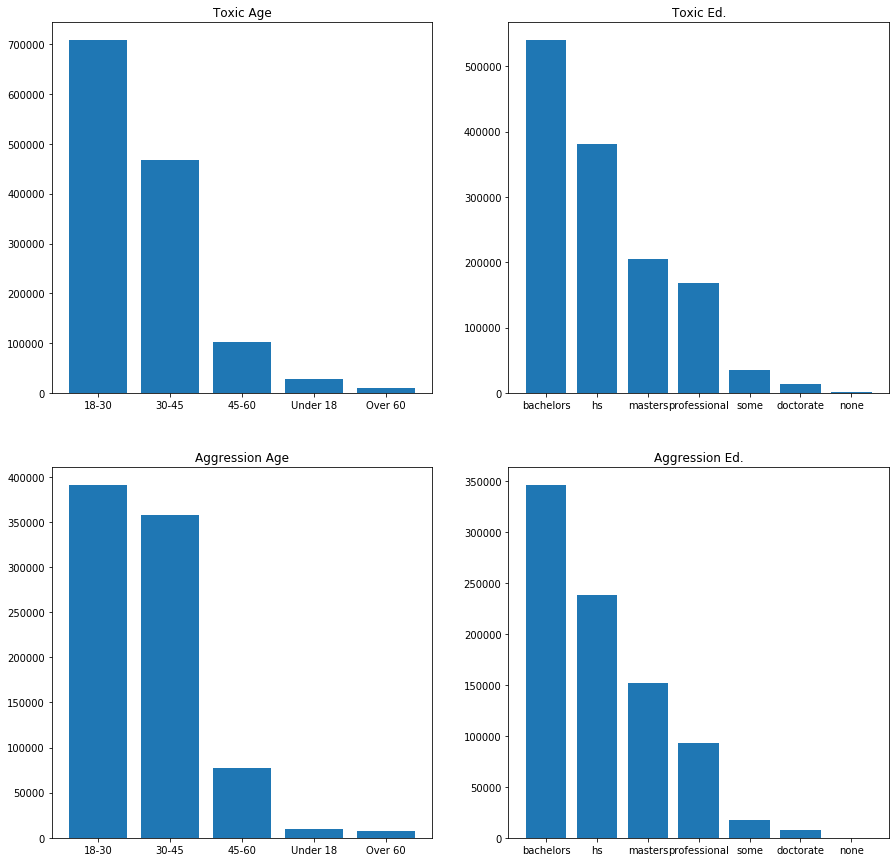

In [105]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,15))
ax1.set_title("Toxic Age")
ax1.bar(list(t_anno_demo.age_group.value_counts().index), t_anno_demo.age_group.value_counts())
ax2.set_title("Toxic Ed.")
ax2.bar(list(t_anno_demo.education.value_counts().index), t_anno_demo.education.value_counts())

ax3.set_title("Aggression Age")
ax3.bar(list(anno_demo.age_group.value_counts().index), anno_demo.age_group.value_counts())
ax4.set_title("Aggression Ed.")
ax4.bar(list(anno_demo.education.value_counts().index), anno_demo.education.value_counts())